# Bayesian T-test

In [1]:
import arviz as az
import bambi as bmb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
az.style.use('arviz-darkgrid')

In this notebook we demo how to perform a Bayesian T-test

## Generate data

In [3]:
a = np.random.normal(5, 2, 1000)
b = np.random.normal(8, 2.5, 1000)
df = pd.DataFrame(
    {
        'Group': ['a'] * 1000 + ['b'] * 1000,
        'Val':np.hstack([a, b])
    }
)

In [4]:
df.groupby('Group').describe()

Val                                                              \
        count      mean       std       min       25%       50%       75%   
Group                                                                       
a      1000.0  5.071356  2.009294 -1.148209  3.711784  5.090100  6.437479   
b      1000.0  8.019168  2.475157 -2.144059  6.425560  8.033717  9.702554   

                  
             max  
Group             
a      11.596340  
b      15.719317

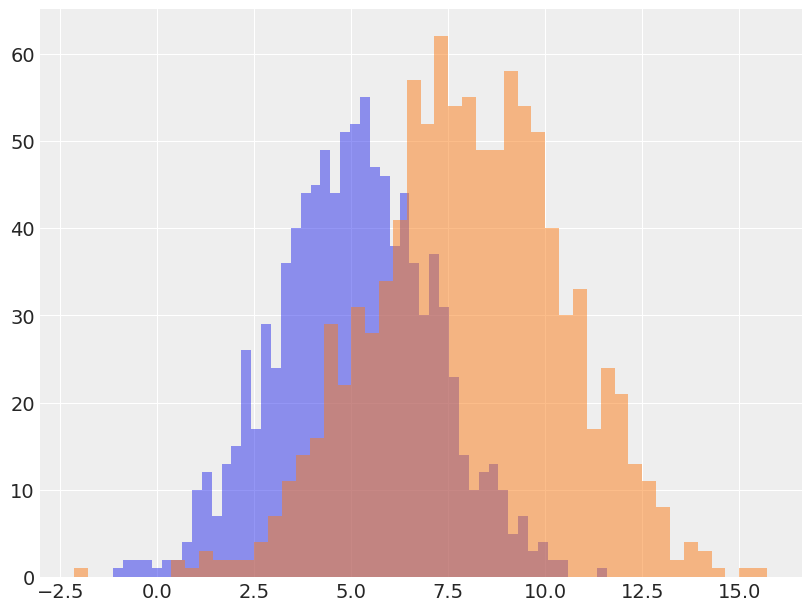

In [5]:
_,ax = plt.subplots(figsize=(8, 6))
ax.hist(a, alpha=0.5, bins=50);
ax.hist(b, alpha=0.5, bins=50);

### Analysis

In [6]:
model = bmb.Model(df)
results = model.fit('Val ~ Group', samples=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Val_sigma, Group, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 17 seconds.


In [7]:
# Here's the setup for the model
model.backend.model

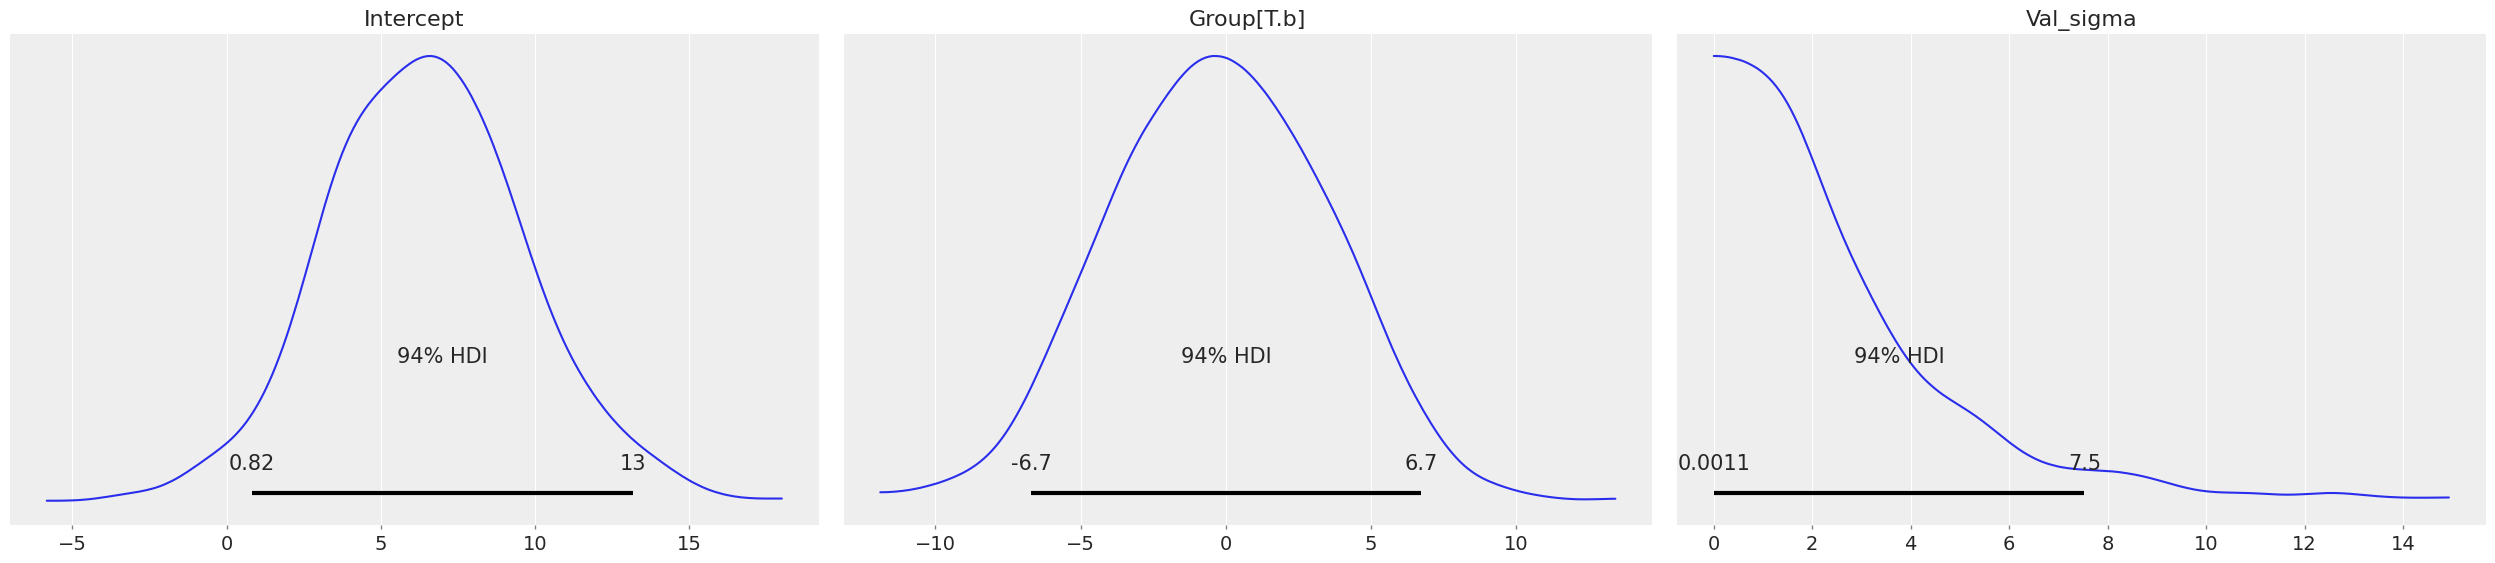

In [8]:
# Model priors
model.plot();

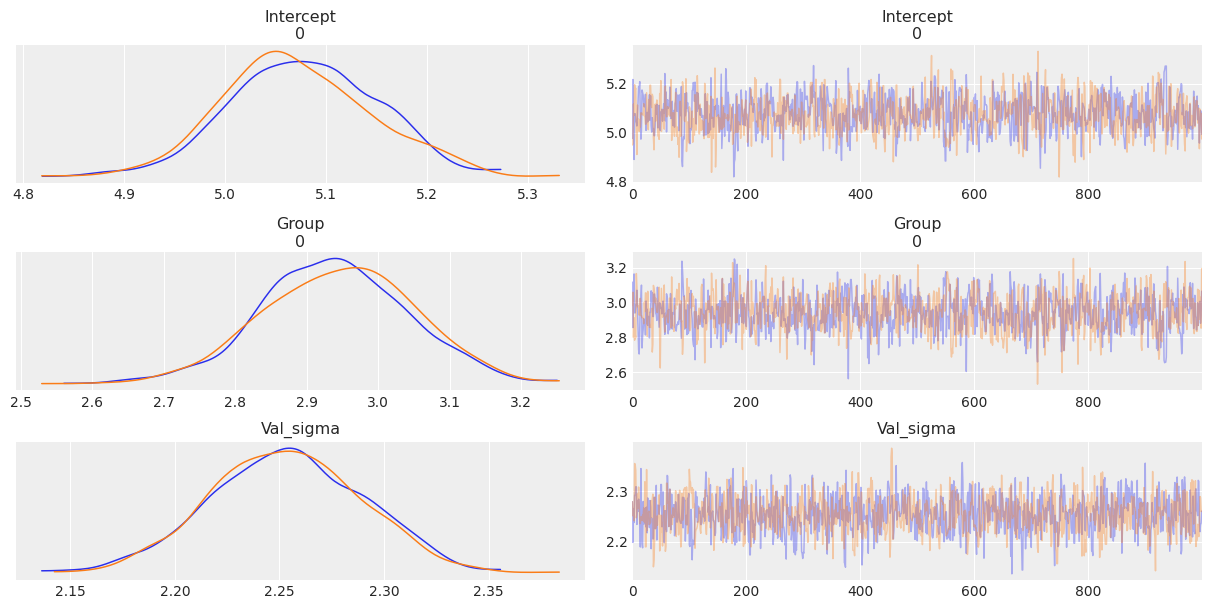

In [9]:
az.plot_trace(results);

In [10]:
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept[0],5.075,0.073,4.948,5.217,0.002,0.002,1077.0,1077.0,1079.0,1250.0,1.0
Group[0],2.942,0.104,2.756,3.143,0.003,0.002,1025.0,1023.0,1021.0,1243.0,1.0
Val_sigma,2.253,0.036,2.188,2.322,0.001,0.001,1263.0,1263.0,1266.0,1062.0,1.0


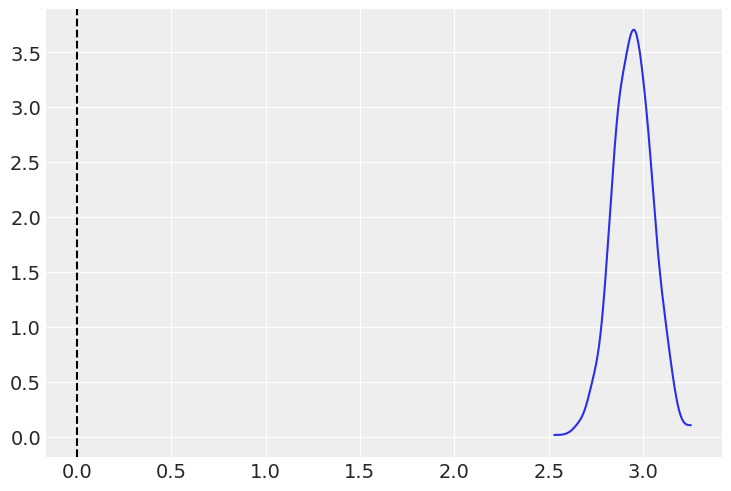

In [11]:
# Grab just the posterior of the term of interest (group)
group_posterior = results.posterior['Group'].values
ax = az.plot_kde(group_posterior)
ax.axvline(0, 0, 3, linestyle='--', color='k');

In [12]:
# Probabiliy that posterior is > 0
(group_posterior > 0).mean()

1.0